# Final GA Project

## Looking at the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = './mental-health-in-tech-2016/mental-heath-in-tech-2016_20161114.csv'

df_16 = pd.read_csv(path)

In [3]:
# Checking Variables and Inputs

# df_16 will be the RAW data
df_16.head(1)

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes


In [4]:
# Making a duplicate DataFrame
df_check = pd.DataFrame(df_16)
df_check.shape

(1433, 63)

In [5]:
#Checking the Amount of Null
df_check.isnull().sum();

In [6]:
# Checking the Variables
df_check.columns;

In [7]:
#Changing Names 
df_check.rename(columns={

#Job
        'Are you self-employed?': 'selfemployed',
       'How many employees does your company or organization have?': 'num_employees',
       'Is your employer primarily a tech company/organization?': 'tech_employer',
       'Is your primary role within your company related to tech/IT?': 'tech_role', ### Note: string

#Work+MH
       'Does your employer provide mental health benefits as part of healthcare coverage?': 'benefits', #
       'Do you know the options for mental health care available under your employer-provided coverage?': 'know_benefits', #
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?' : 'disc_mh',#
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?': 'mh_edu',#
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?': 'anon', #
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:' : 'ease_askleave',
       'Do you think that discussing a mental health disorder with your employer would have negative consequences?' : 'disc_mhstigma', #
       'Do you think that discussing a physical health issue with your employer would have negative consequences?' : 'disc_phstigma',#
       'Would you feel comfortable discussing a mental health disorder with your coworkers?' : 'disc_coworkers', #
       'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?': 'disc_superv', #
       'Do you feel that your employer takes mental health as seriously as physical health?': 'employer_mhph',    #
       'Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?': 'obs_coworkers', #
        'Do you have medical coverage (private insurance or state-provided) which includes treatment of  mental health issues?': 'mh_coverage',
#Reveal
       'Do you know local or online resources to seek help for a mental health disorder?': 'know_other_resources',
       'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?': 'reveal_clients',
       'If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?': 'reveal_clients_impact',
       'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?': 'reveal_work',
       'If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?': 'reveal_work_impact',

#Productivity ---- DECISION TREE
       'Do you believe your productivity is ever affected by a mental health issue?': 'pdy',
       'If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?': 'pdy_pct',

#Previous Employers 'prv' ## 11 or the 11 are asked in regards to current employer
       'Do you have previous employers?' : 'prv_emp',
       'Have your previous employers provided mental health benefits?' : 'prv_benefits',
       'Were you aware of the options for mental health care provided by your previous employers?' : 'prv_know_benefits',
       'Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?': 'prv_disc_mh',
       'Did your previous employers provide resources to learn more about mental health issues and how to seek help?': 'prv_mh_edu' ,
       'Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?': 'prv_anon',            
       'Do you think that discussing a mental health disorder with previous employers would have negative consequences?': 'prv_disc_mhstigma',
       'Do you think that discussing a physical health issue with previous employers would have negative consequences?': 'prv_disc_phstigma',
       'Would you have been willing to discuss a mental health issue with your previous co-workers?': 'prv_disc_coworkers',
       'Would you have been willing to discuss a mental health issue with your direct supervisor(s)?': 'prv_disc_superv',
       'Did you feel that your previous employers took mental health as seriously as physical health?': 'prv_employer_mhph',
       'Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?': 'prv_obs_coworkers',

#MH and Sharing
       'Would you be willing to bring up a physical health issue with a potential employer in an interview?': 'ph_int',
       'Why or why not?': 'ph_int_why',
       'Would you bring up a mental health issue with a potential employer in an interview?': 'mh_int',
       'Why or why not?.1': 'mh_int_why',
       'Do you feel that being identified as a person with a mental health issue would hurt your career?': 'mh_hurt_career',
       'Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?': 'team_mhstigma',
       'How willing would you be to share with friends and family that you have a mental illness?': 'share',
       'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?' : 'obs_bad_rxn',       
       'Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?': 'rxn_coworker',

#History
       'Do you have a family history of mental illness?': 'mh_fam_history',                   
       'Have you had a mental health disorder in the past?': 'mh_history',

#MH Disorder --- DECISION TREE
       'Do you currently have a mental health disorder?': 'mhnow',      
       'If yes, what condition(s) have you been diagnosed with?': 'mhnow_cond',
       'If maybe, what condition(s) do you believe you have?': 'mhnow_selfdiag',

#MH Professional Diagnosis --- DECISION TREE
       'Have you been diagnosed with a mental health condition by a medical professional?': 'diag',
       'If so, what condition(s) were you diagnosed with?': 'diag_cond',
    
#Treatment
       'Have you ever sought treatment for a mental health issue from a mental health professional?': 'treat',
       'If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?' : 'treat_effective',
       'If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?': 'treat_noteffective',

#Work/Demographics
        'What is your age?': 'age',
        'What is your gender?': 'gender',
       'What country do you live in?': 'country',
       'What US state or territory do you live in?': 'state',
       'What country do you work in?': 'country_work',
       'What US state or territory do you work in?': 'state_work',
       'Which of the following best describes your work position?': 'work',
       'Do you work remotely?': 'remote'}, inplace=True)

In [8]:
# New Naming Scheme
df_check.columns

Index(['selfemployed', 'num_employees', 'tech_employer', 'tech_role',
       'benefits', 'know_benefits', 'disc_mh', 'mh_edu', 'anon',
       'ease_askleave', 'disc_mhstigma', 'disc_phstigma', 'disc_coworkers',
       'disc_superv', 'employer_mhph', 'obs_coworkers',
       'Do you have medical coverage (private insurance or state-provided) which includes treatment of  mental health issues?',
       'know_other_resources', 'reveal_clients', 'reveal_clients_impact',
       'reveal_work', 'reveal_work_impact', 'pdy', 'pdy_pct', 'prv_emp',
       'prv_benefits', 'prv_know_benefits', 'prv_disc_mh', 'prv_mh_edu',
       'prv_anon', 'prv_disc_mhstigma', 'prv_disc_phstigma',
       'prv_disc_coworkers', 'prv_disc_superv', 'prv_employer_mhph',
       'prv_obs_coworkers', 'ph_int', 'ph_int_why', 'mh_int', 'mh_int_why',
       'mh_hurt_career', 'team_mhstigma', 'share', 'obs_bad_rxn',
       'rxn_coworker', 'mh_fam_history', 'mh_history', 'mhnow', 'mhnow_cond',
       'mhnow_selfdiag', 'diag', 'd

In [9]:
# Fixing Column with long name:
df_check.rename(columns={'Do you have medical coverage (private insurance or state-provided) which includes treatment of \xa0mental health issues?': 'mh_coverage'}, inplace=True)
# Checking if it worked:
df_check.iloc[:,16].name

'mh_coverage'

In [10]:
# Making the dataframe naming scheme easier: 'df'
df = pd.DataFrame(df_check);
df.columns

Index(['selfemployed', 'num_employees', 'tech_employer', 'tech_role',
       'benefits', 'know_benefits', 'disc_mh', 'mh_edu', 'anon',
       'ease_askleave', 'disc_mhstigma', 'disc_phstigma', 'disc_coworkers',
       'disc_superv', 'employer_mhph', 'obs_coworkers', 'mh_coverage',
       'know_other_resources', 'reveal_clients', 'reveal_clients_impact',
       'reveal_work', 'reveal_work_impact', 'pdy', 'pdy_pct', 'prv_emp',
       'prv_benefits', 'prv_know_benefits', 'prv_disc_mh', 'prv_mh_edu',
       'prv_anon', 'prv_disc_mhstigma', 'prv_disc_phstigma',
       'prv_disc_coworkers', 'prv_disc_superv', 'prv_employer_mhph',
       'prv_obs_coworkers', 'ph_int', 'ph_int_why', 'mh_int', 'mh_int_why',
       'mh_hurt_career', 'team_mhstigma', 'share', 'obs_bad_rxn',
       'rxn_coworker', 'mh_fam_history', 'mh_history', 'mhnow', 'mhnow_cond',
       'mhnow_selfdiag', 'diag', 'diag_cond', 'treat', 'treat_effective',
       'treat_noteffective', 'age', 'gender', 'country', 'state',
       '

In [11]:
df.dtypes.head(2)

selfemployed      int64
num_employees    object
dtype: object

In [12]:
df.isnull().sum().head(2)

selfemployed       0
num_employees    287
dtype: int64

# GOING TO CLEAN SOME DATA

## Gender

In [13]:
df.gender.describe()

count     1430
unique      70
top       Male
freq       610
Name: gender, dtype: object

In [14]:
df.gender.value_counts()

Male                                                                                                                                                             610
male                                                                                                                                                             249
Female                                                                                                                                                           153
female                                                                                                                                                            95
M                                                                                                                                                                 86
m                                                                                                                                                                 79
F         

In [15]:
# There is a lot of unique entries. All are string. Going to categorize...
df['gender'] = df['gender'].replace([
    'male', 'Male ', 'M', 'm', 'man', 'Cis male',
    'Male.', 'Male (cis)', 'Man', 'Sex is male',
    'cis male', 'Malr', 'Dude', "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
    'mail', 'M|', 'male ', 'Cis Male', 'Male (trans, FtM)',
    'cisdude', 'cis man', 'MALE'], 'Male')
df['gender'] = df['gender'].replace([
    'female', 'I identify as female.', 'female ',
    'Female assigned at birth ', 'F', 'Woman', 'fm', 'f',
    'Cis female', 'Transitioned, M2F', 'Female or Multi-Gender Femme',
    'Female ', 'woman', 'female/woman', 'Cisgender Female', 
    'mtf', 'fem', 'Female (props for making this a freeform field, though)',
    ' Female', 'Cis-woman', 'AFAB', 'Transgender woman',
    'Cis female '], 'Female')
df['gender'] = df['gender'].replace([
    'Bigender', 'non-binary,', 'Genderfluid (born female)',
    'Other/Transfeminine', 'Androgynous', 'male 9:1 female, roughly',
    'nb masculine', 'genderqueer', 'Human', 'Genderfluid',
    'Enby', 'genderqueer woman', 'Queer', 'Agender', 'Fluid',
    'Genderflux demi-girl', 'female-bodied; no feelings about gender',
    'non-binary', 'Male/genderqueer', 'Nonbinary', 'Other', 'none of your business',
    'Unicorn', 'human', 'Genderqueer'], 'Genderqueer/Other')

In [16]:
df.gender.value_counts(dropna=False)

Male                 1058
Female                343
Genderqueer/Other      29
NaN                     3
Name: gender, dtype: int64

## Age

In [17]:
df.age.describe()

count    1433.000000
mean       34.286113
std        11.290931
min         3.000000
25%        28.000000
50%        33.000000
75%        39.000000
max       323.000000
Name: age, dtype: float64

In [18]:
# There are some weird extremes in age. Let's look for outliers and if they are reasonable for our demographic.
print(df.loc[df['age'] > 70, ['age']])
print(df.loc[df['age'] < 18, ['age']])

      age
372    99
564   323
1117   74
     age
93    17
656    3
808   15


In [19]:
# Removing outliers
df.drop(df.index[[372,564,1117,93,656,808]], inplace=True)

In [20]:
print(df.loc[df['age'] > 70, ['age']])
print(df.loc[df['age'] < 18, ['age']])

Empty DataFrame
Columns: [age]
Index: []
Empty DataFrame
Columns: [age]
Index: []


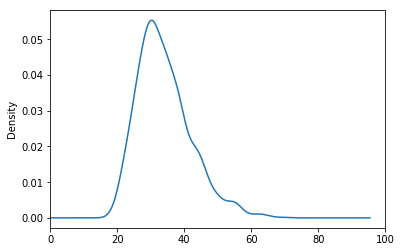

In [21]:
df.age.plot(kind='density', xlim=(0,100));

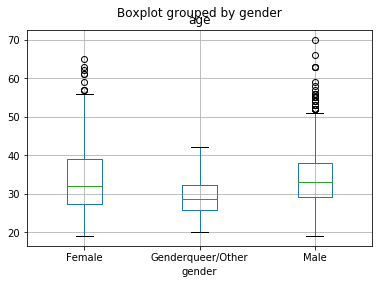

In [22]:
df.boxplot(column='age', by='gender');



# Data Viz (Descriptive Stats) 

## Classifying MH Disorders

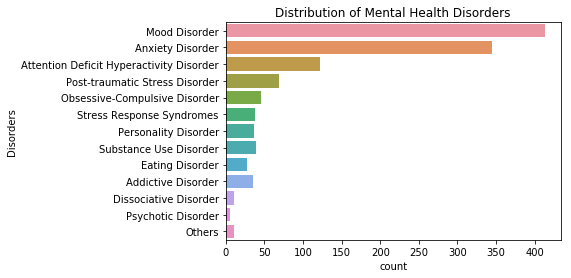

In [23]:
####Common Mental Health Disorders
disorders = {}

disorderCounts = dict(df['mhnow_cond'].value_counts())
for i in disorderCounts:
    # get the disorders separately in case someone answered with more than one disorder
    disorderList = i.split('|')
    for j in disorderList:
        j = j.split(' (')[0]
        disorders[j] = disorders.get(j, 0) + disorderCounts[i]

tmp = pd.DataFrame()
for i in disorders:
    tmp = tmp.append([i] * disorders[i])

tmp[0] = tmp[0].replace([
    'Autism Spectrum Disorder', 'Autism - while not a "mental illness", still greatly affects how I handle anxiety',
    'autism spectrum disorder', 'PDD-NOS'], 'Autism')
tmp[0] = tmp[0].replace(['Aspergers', 'Asperger Syndrome'], "Asperger's Syndrome")
tmp[0] = tmp[0].replace(['posttraumatic stress disourder'], 'Post-traumatic Stress Disorder')
tmp[0] = tmp[0].replace(['ADD', 'Attention Deficit Disorder', 'attention deficit disorder'],
                       'Attention Deficit Hyperactivity Disorder')
tmp[0] = tmp[0].replace(['Schizotypal Personality Disorder'], 'Personality Disorder')
tmp[0] = tmp[0].replace(['Depression'], 'Mood Disorder')
tmp[0] = tmp[0].replace([
    'Autism', "Asperger's Syndrome", 'Intimate Disorder',
    'Seasonal Affective Disorder', 'Burn out', 'Gender Identity Disorder',
    'Suicidal Ideation', 'Gender Dysphoria', 'MCD'], 'Others')
g = sns.countplot(y=tmp[0], order=[
    'Mood Disorder', 'Anxiety Disorder', 'Attention Deficit Hyperactivity Disorder',
    'Post-traumatic Stress Disorder', 'Obsessive-Compulsive Disorder',
    'Stress Response Syndromes', 'Personality Disorder', 'Substance Use Disorder',
    'Eating Disorder', 'Addictive Disorder', 'Dissociative Disorder', 
    'Psychotic Disorder', 'Others'])
g.set_ylabel('Disorders')
g.set_title('Distribution of Mental Health Disorders')
plt.show()

## Tech Roles

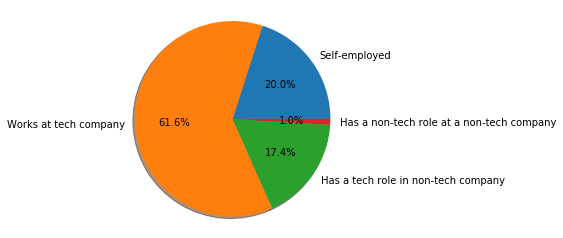

In [24]:
labels = ['Self-employed', 'Works at tech company', 'Has a tech role in non-tech company', 'Has a non-tech role at a non-tech company']
sizes = [df['selfemployed'].value_counts()[1],
         df['tech_employer'].value_counts()[1],
         df['tech_role'].value_counts()[1],
         df['tech_role'].value_counts()[0]
        ]
# print(sizes) # adds up to 1433, which is the total number of participants
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()







## Seeing Value Counts Across Variables

In [25]:
## All inputs for each variable
column_list = df.columns.values.tolist()
for column_name in column_list:
    print(column_name);
    print(df[column_name].unique());
    print('\n')

selfemployed
[0 1]


num_employees
['26-100' '6-25' nan 'More than 1000' '100-500' '500-1000' '1-5']


tech_employer
[ 1. nan  0.]


tech_role
[nan  1.  0.]


benefits
['Not eligible for coverage / N/A' 'No' nan 'Yes' "I don't know"]


know_benefits
[nan 'Yes' 'I am not sure' 'No']


disc_mh
['No' 'Yes' nan "I don't know"]


mh_edu
['No' 'Yes' nan "I don't know"]


anon
["I don't know" 'Yes' nan 'No']


ease_askleave
['Very easy' 'Somewhat easy' 'Neither easy nor difficult' nan
 'Very difficult' 'Somewhat difficult' "I don't know"]


disc_mhstigma
['No' 'Maybe' nan 'Yes']


disc_phstigma
['No' nan 'Maybe' 'Yes']


disc_coworkers
['Maybe' nan 'Yes' 'No']


disc_superv
['Yes' 'Maybe' nan 'No']


employer_mhph
["I don't know" 'Yes' nan 'No']


obs_coworkers
['No' nan 'Yes']


mh_coverage
[nan  1.  0.]


know_other_resources
[nan 'Yes, I know several' 'I know some' "No, I don't know any"]


reveal_clients
[nan 'Sometimes, if it comes up' "No, because it doesn't matter"
 'No, because it wou

In [26]:
## Summary of variables: descriptive stats + unique

column_list = df.columns.values.tolist()
for column_name in column_list:
    print(column_name);
    print(df[column_name].describe())
    print(df[column_name].value_counts(dropna=False));
    print('\n')

selfemployed
count    1427.000000
mean        0.200420
std         0.400455
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: selfemployed, dtype: float64
0    1141
1     286
Name: selfemployed, dtype: int64


num_employees
count       1141
unique         6
top       26-100
freq         292
Name: num_employees, dtype: object
26-100            292
NaN               286
More than 1000    255
100-500           246
6-25              208
500-1000           80
1-5                60
Name: num_employees, dtype: int64


tech_employer
count    1141.000000
mean        0.770377
std         0.420775
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: tech_employer, dtype: float64
 1.0    879
NaN     286
 0.0    262
Name: tech_employer, dtype: int64


tech_role
count    262.000000
mean       0.946565
std        0.225330
min        0.000000
25%        1.000000
50%        1.000000
75

Name: team_mhstigma, dtype: int64


share
count              1427
unique                6
top       Somewhat open
freq                638
Name: share, dtype: object
Somewhat open                                            638
Very open                                                251
Somewhat not open                                        213
Neutral                                                  140
Not applicable to me (I do not have a mental illness)    111
Not open at all                                           74
Name: share, dtype: int64


obs_bad_rxn
count     1339
unique       4
top         No
freq       567
Name: obs_bad_rxn, dtype: object
No                    567
Maybe/Not sure        344
Yes, I observed       263
Yes, I experienced    165
NaN                    88
Name: obs_bad_rxn, dtype: int64


rxn_coworker
count     653
unique      3
top       Yes
freq      244
Name: rxn_coworker, dtype: object
NaN      774
Yes      244
No       234
Maybe    175
Name: rxn_coworke

## Dummy Dum Dum

In [27]:
df_d = df.copy()

In [28]:
df_d.drop(['know_benefits','anon','disc_phstigma','employer_mhph','mh_coverage',
    'know_other_resources','reveal_clients','reveal_clients_impact','reveal_work','reveal_work_impact','pdy',
    'pdy_pct','prv_emp','prv_know_benefits','prv_anon','prv_disc_phstigma','prv_employer_mhph','ph_int',
    'ph_int_why','mh_int','mh_int_why','mhnow_cond','mhnow_selfdiag','diag','diag_cond',
           'state','state_work','work','selfemployed', 'tech_employer', 'disc_mh', 'disc_coworkers', 'disc_superv', 
           'obs_coworkers','remote','country_work','mh_fam_history', 'mh_history', 'mhnow','prv_mh_edu',
           'prv_disc_mhstigma','prv_disc_coworkers','prv_obs_coworkers','share','country_work',
           'treat','tech_role','mh_edu', 'country', 'prv_disc_mh', 'prv_disc_superv','prv_benefits','benefits'],
          axis=1, inplace=True)

In [29]:
df_d.columns

Index(['num_employees', 'ease_askleave', 'disc_mhstigma', 'mh_hurt_career',
       'team_mhstigma', 'obs_bad_rxn', 'rxn_coworker', 'treat_effective',
       'treat_noteffective', 'age', 'gender'],
      dtype='object')

In [30]:
df_d.shape

(1427, 11)

In [31]:
df_d.head(1)

,num_employees,ease_askleave,disc_mhstigma,mh_hurt_career,team_mhstigma,obs_bad_rxn,rxn_coworker,treat_effective,treat_noteffective,age,gender
0,26-100,Very easy,No,Maybe,"No, I don't think they would",No,NaN,Not applicable to me,Not applicable to me,39,Male


In [32]:
df_d.shape

(1427, 11)

In [33]:
df_d.head(1)

,num_employees,ease_askleave,disc_mhstigma,mh_hurt_career,team_mhstigma,obs_bad_rxn,rxn_coworker,treat_effective,treat_noteffective,age,gender
0,26-100,Very easy,No,Maybe,"No, I don't think they would",No,NaN,Not applicable to me,Not applicable to me,39,Male


### Let's Dummy It

In [34]:
## Seeing the different values

## All inputs for each variable
column_list = df_d.columns.values.tolist()
for column_name in column_list:
    print(column_name);
    print(df[column_name].unique());
    print('\n')

num_employees
['26-100' '6-25' nan 'More than 1000' '100-500' '500-1000' '1-5']


ease_askleave
['Very easy' 'Somewhat easy' 'Neither easy nor difficult' nan
 'Very difficult' 'Somewhat difficult' "I don't know"]


disc_mhstigma
['No' 'Maybe' nan 'Yes']


mh_hurt_career
['Maybe' "No, I don't think it would" 'Yes, I think it would'
 'No, it has not' 'Yes, it has']


team_mhstigma
["No, I don't think they would" 'Maybe' 'Yes, they do'
 'Yes, I think they would' 'No, they do not']


obs_bad_rxn
['No' 'Maybe/Not sure' 'Yes, I experienced' 'Yes, I observed' nan]


rxn_coworker
[nan 'Yes' 'No' 'Maybe']


treat_effective
['Not applicable to me' 'Rarely' 'Sometimes' 'Never' 'Often']


treat_noteffective
['Not applicable to me' 'Sometimes' 'Often' 'Rarely' 'Never']


age
[39 29 38 43 42 30 37 44 28 34 35 52 32 25 31 26 33 27 36 40 46 41 45 19
 21 24 23 22 51 48 55 50 49 20 54 47 56 57 63 61 62 53 58 66 59 65 70]


gender
['Male' 'Female' 'Genderqueer/Other' nan]




### The Bucket of Editted-Down Variables
df_d['?'] = df_d['?'].replace([''], '?')


In [35]:
df_d['gender'] = df_d['gender'].replace(['Male'], 0)
df_d['gender'] = df_d['gender'].replace(['Female'], 1)
df_d['gender'] = df_d['gender'].replace(['Genderqueer/Other'], 2)
df_d['gender'] = df_d['gender'].fillna(-1)
df_d.gender.value_counts(dropna=False);

df_d['treat_noteffective'] = df_d['treat_noteffective'].replace(['Not applicable to me'], -1)
df_d['treat_noteffective'] = df_d['treat_noteffective'].replace(['Never'], 0)
df_d['treat_noteffective'] = df_d['treat_noteffective'].replace(['Rarely'], 1)
df_d['treat_noteffective'] = df_d['treat_noteffective'].replace(['Sometimes'], 2)
df_d['treat_noteffective'] = df_d['treat_noteffective'].replace(['Often'], 3)
df_d['treat_noteffective'] = df_d['treat_noteffective'].fillna(-1)
df_d.treat_noteffective.value_counts();


In [36]:
df_d['num_employees'] = df_d['num_employees'].replace(['1-5'], 1)
df_d['num_employees'] = df_d['num_employees'].replace(['6-25'], 2)
df_d['num_employees'] = df_d['num_employees'].replace(['26-100'], 3)
df_d['num_employees'] = df_d['num_employees'].replace(['100-500'], 4)
df_d['num_employees'] = df_d['num_employees'].replace(['500-1000'], 5)
df_d['num_employees'] = df_d['num_employees'].replace(['More than 1000'], 6)
df_d['num_employees'] = df_d['num_employees'].fillna(0)
df_d.num_employees.value_counts(dropna=False);

# NAN: 0

In [37]:
df_d['ease_askleave'] = df_d['ease_askleave'].replace(['Very easy'], 5)
df_d['ease_askleave'] = df_d['ease_askleave'].replace(['Somewhat easy'], 4)
df_d['ease_askleave'] = df_d['ease_askleave'].replace(['Neither easy nor difficult'], 3)
df_d['ease_askleave'] = df_d['ease_askleave'].replace(['Very difficult'], 1)
df_d['ease_askleave'] = df_d['ease_askleave'].replace(['Somewhat difficult'], 2)
df_d['ease_askleave'] = df_d['ease_askleave'].replace(["I don't know"], -1)
df_d['ease_askleave'] = df_d['ease_askleave'].fillna(-1)
df_d.ease_askleave.value_counts();

# (idk) + nan: -1

In [38]:
df_d['disc_mhstigma'] = df_d['disc_mhstigma'].replace(['No'], 0)
df_d['disc_mhstigma'] = df_d['disc_mhstigma'].replace(['Maybe'], 1)
df_d['disc_mhstigma'] = df_d['disc_mhstigma'].replace(['Yes'], 2)
df_d['disc_mhstigma'] = df_d['disc_mhstigma'].fillna(-1)
df_d.disc_mhstigma.value_counts();

# nan: -1

In [39]:
df_d['mh_hurt_career'] = df_d['mh_hurt_career'].replace(['No, it has not'], 1)
df_d['mh_hurt_career'] = df_d['mh_hurt_career'].replace(["No, I don't think it would"], 2)
df_d['mh_hurt_career'] = df_d['mh_hurt_career'].replace(['Maybe'], 3)
df_d['mh_hurt_career'] = df_d['mh_hurt_career'].replace(['Yes, I think it would'], 4)
df_d['mh_hurt_career'] = df_d['mh_hurt_career'].replace(['Yes, it has'], 5)
df_d['mh_hurt_career'] = df_d['mh_hurt_career'].fillna(-1)
df_d.mh_hurt_career.value_counts();

#NaN: -1


In [40]:
df_d['team_mhstigma'] = df_d['team_mhstigma'].replace(['No, they do not'], 1)
df_d['team_mhstigma'] = df_d['team_mhstigma'].replace(["No, I don't think they would"], 2)
df_d['team_mhstigma'] = df_d['team_mhstigma'].replace(['Maybe'], 3)
df_d['team_mhstigma'] = df_d['team_mhstigma'].replace(['Yes, I think they would'], 4)
df_d['team_mhstigma'] = df_d['team_mhstigma'].replace(['Yes, they do'], 5)
df_d['team_mhstigma'] = df_d['team_mhstigma'].fillna(-1)
df_d.team_mhstigma.value_counts();

#Nan: -1

In [41]:
df_d['obs_bad_rxn'] = df_d['obs_bad_rxn'].replace(['No'], 0)
df_d['obs_bad_rxn'] = df_d['obs_bad_rxn'].replace(['Maybe/Not sure'], 1)
df_d['obs_bad_rxn'] = df_d['obs_bad_rxn'].replace(['Yes, I experienced','Yes, I observed'], 2)
df_d['obs_bad_rxn'] = df_d['obs_bad_rxn'].fillna(-1)
df_d.obs_bad_rxn.value_counts();

# Combined Yes, I experienced and Yes, I observed : 1 ;; Nan: -1

In [42]:
df_d['rxn_coworker'] = df_d['rxn_coworker'].replace(['No'], 0)
df_d['rxn_coworker'] = df_d['rxn_coworker'].replace(['Maybe'], 1)
df_d['rxn_coworker'] = df_d['rxn_coworker'].replace(['Yes'], 2)
df_d['rxn_coworker'] = df_d['rxn_coworker'].fillna(-1)
df_d.rxn_coworker.value_counts();

#Nan: -1

In [43]:
df_d['treat_effective'] = df_d['treat_effective'].replace(['Not applicable to me'], -1)
df_d['treat_effective'] = df_d['treat_effective'].replace(['Never'], 0)
df_d['treat_effective'] = df_d['treat_effective'].replace(['Rarely'], 1)
df_d['treat_effective'] = df_d['treat_effective'].replace(['Sometimes'], 2)
df_d['treat_effective'] = df_d['treat_effective'].replace(['Often'], 3)
df_d['treat_effective'] = df_d['treat_effective'].fillna(-1)
df_d.treat_effective.value_counts();

# Nan + Not applicable : -1

In [44]:
column_list = df_d.columns.values.tolist()
for column_name in column_list:
    print(column_name);
    print(df_d[column_name].unique());
    print('\n')

num_employees
[3. 2. 0. 6. 4. 5. 1.]


ease_askleave
[ 5.  4.  3. -1.  1.  2.]


disc_mhstigma
[ 0.  1. -1.  2.]


mh_hurt_career
[3 2 4 1 5]


team_mhstigma
[2 3 5 4 1]


obs_bad_rxn
[ 0.  1.  2. -1.]


rxn_coworker
[-1.  2.  0.  1.]


treat_effective
[-1  1  2  0  3]


treat_noteffective
[-1  2  3  1  0]


age
[39 29 38 43 42 30 37 44 28 34 35 52 32 25 31 26 33 27 36 40 46 41 45 19
 21 24 23 22 51 48 55 50 49 20 54 47 56 57 63 61 62 53 58 66 59 65 70]


gender
[ 0.  1.  2. -1.]







# Messing with Decision Trees + Random Forests  

## Preparing Random Forests

In [45]:
df_d.shape

(1427, 11)

## Bagged: 10

In [46]:
## 1: Bagging
# Set a seed for reproducibility.
np.random.seed(123)

# Create ten bootstrap samples (which will be used to select rows from the DataFrame).
samples = [np.random.choice(a=1427, size=1427, replace=True) 
           for _ in range(1, 11)]
samples

[array([1389, 1406, 1346, ...,  953,  411,  794]),
 array([998, 867, 893, ..., 216,  51, 419]),
 array([1373,  514,  308, ...,   76, 1078,  292]),
 array([1385,  261,  879, ..., 1005, 1281,  647]),
 array([ 965,  945,  410, ...,  673, 1419,  240]),
 array([ 347, 1398,  987, ...,  120,  530,  387]),
 array([ 757, 1191,  857, ..., 1076, 1423,  475]),
 array([ 840,  705, 1142, ...,  339,  120,  572]),
 array([365,  36, 175, ..., 110, 791, 341]),
 array([1245,  773,  140, ...,  410,   49, 1042])]

In [47]:
# Preparing the training data.
train = pd.DataFrame(df_d)

In [48]:
# Show the rows for the first decision tree.
train.iloc[samples[0], :];

In [49]:
# Preparing the testing data.
test = pd.DataFrame(df_d)

In [50]:
from sklearn.tree import DecisionTreeRegressor

# Grow each tree deep.
treereg = DecisionTreeRegressor(max_depth=None, random_state=123)

# List for storing predicted price from each tree:
predictions = []

# Define testing data.
X_test = test.iloc[:, 1:]
y_test = test.iloc[:, 0]

# Grow one tree for each bootstrap sample and make predictions on testing data.
for sample in samples:
    X_train = train.iloc[sample, 1:]
    y_train = train.iloc[sample, 0]
    treereg.fit(X_train, y_train)
    y_pred = treereg.predict(X_test)
    predictions.append(y_pred)

# Convert predictions from list to NumPy array.
predictions = np.array(predictions)

In [51]:
# Average predictions.
np.mean(predictions, axis=0)

array([2.8, 3.1, 3.3, ..., 3.6, 3.3, 3.6])

In [52]:
# Calculate RMSE.
from sklearn import metrics
y_pred = np.mean(predictions, axis=0)
bagged10_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

## Bagged: 500

In [53]:
## Bagged Decision Trees in scikit-learn (with B=500)
X_train = train.iloc[:, 1:]
y_train = train.iloc[:, 0]
X_test = test.iloc[:, 1:]
y_test = test.iloc[:, 0]


# Instruct BaggingRegressor to use DecisionTreeRegressor as the "base estimator."
from sklearn.ensemble import BaggingRegressor
bagreg = BaggingRegressor(DecisionTreeRegressor(), n_estimators=500, 
                          bootstrap=True, oob_score=True, random_state=1)

# Fit and predict.
bagreg.fit(X_train, y_train)
y_pred = bagreg.predict(X_test)

In [54]:
# Calculate RMSE.
bagged500_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("Bagged RMSE (B=500)" , bagged500_RMSE)
print("Bagged RMSE (B=10)" , bagged10_RMSE)

Bagged RMSE (B=500) 0.550746043178114
Bagged RMSE (B=10) 0.641585473738397


## Estimating Out-of-Sample Error

In [55]:
# Show the first bootstrap sample.
print(samples[0])

# Show the "in-bag" observations for each sample.
for sample in samples:
    print(set(sample))

[1389 1406 1346 ...  953  411  794]
{1, 2, 3, 4, 6, 8, 9, 10, 11, 14, 16, 17, 19, 22, 23, 24, 25, 26, 27, 29, 32, 34, 37, 38, 39, 40, 41, 44, 46, 47, 48, 49, 51, 52, 53, 55, 56, 57, 58, 59, 60, 62, 65, 67, 69, 70, 71, 73, 74, 77, 78, 79, 80, 82, 83, 88, 89, 90, 92, 93, 95, 96, 97, 98, 99, 100, 101, 102, 105, 106, 107, 109, 111, 113, 117, 118, 121, 122, 123, 124, 125, 126, 128, 133, 135, 137, 138, 139, 140, 143, 144, 145, 146, 149, 150, 151, 152, 153, 158, 159, 160, 161, 162, 163, 164, 165, 166, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 179, 180, 181, 183, 191, 192, 193, 194, 195, 197, 199, 200, 201, 202, 205, 207, 211, 212, 213, 214, 215, 217, 219, 220, 222, 223, 224, 225, 227, 230, 231, 232, 236, 238, 240, 241, 242, 244, 245, 247, 248, 251, 253, 254, 255, 258, 259, 262, 264, 265, 268, 269, 271, 272, 274, 280, 281, 282, 283, 284, 285, 286, 287, 288, 290, 291, 293, 294, 295, 296, 298, 299, 300, 302, 303, 305, 311, 312, 313, 317, 321, 322, 323, 324, 325, 329, 330, 331, 332, 333, 

In [56]:
#Show the "out-of-bag" observations for each sample.
for sample in samples:
    print(sorted(set(range(1427)) - set(sample)))

[0, 5, 7, 12, 13, 15, 18, 20, 21, 28, 30, 31, 33, 35, 36, 42, 43, 45, 50, 54, 61, 63, 64, 66, 68, 72, 75, 76, 81, 84, 85, 86, 87, 91, 94, 103, 104, 108, 110, 112, 114, 115, 116, 119, 120, 127, 129, 130, 131, 132, 134, 136, 141, 142, 147, 148, 154, 155, 156, 157, 167, 178, 182, 184, 185, 186, 187, 188, 189, 190, 196, 198, 203, 204, 206, 208, 209, 210, 216, 218, 221, 226, 228, 229, 233, 234, 235, 237, 239, 243, 246, 249, 250, 252, 256, 257, 260, 261, 263, 266, 267, 270, 273, 275, 276, 277, 278, 279, 289, 292, 297, 301, 304, 306, 307, 308, 309, 310, 314, 315, 316, 318, 319, 320, 326, 327, 328, 336, 343, 348, 351, 352, 353, 356, 357, 368, 369, 372, 374, 375, 379, 381, 382, 384, 385, 386, 388, 394, 395, 397, 403, 406, 409, 410, 415, 417, 421, 423, 427, 429, 431, 433, 437, 440, 444, 449, 450, 452, 458, 463, 466, 468, 472, 476, 478, 482, 483, 486, 489, 498, 500, 501, 502, 511, 512, 517, 520, 522, 524, 525, 529, 533, 535, 543, 546, 547, 550, 553, 554, 556, 558, 561, 564, 565, 566, 569, 579, 58

In [57]:
# Compute the out-of-bag R-squared score (not MSE, unfortunately) for B=500.
bagreg.oob_score_

#When B is sufficiently large, the **out-of-bag error** is an accurate estimate of **out-of-sample error**.

0.49383312530015244

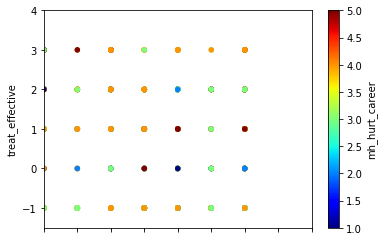

In [58]:
df_d.plot(kind='scatter', x='num_employees', y='treat_effective', c='mh_hurt_career', colormap='jet', xlim=(0, 8), ylim=(-1.5, 4));

# Messing with Decision Trees + Random Forests  

## 1) Predicting Y with Decision Tree

In [59]:
# Note: in columns, consider what you want to drop
feature_cols = df_d.columns.drop('mh_hurt_career')
feature_cols

X = df_d[feature_cols]
y = df_d['mh_hurt_career']

In [60]:
from sklearn.tree import DecisionTreeRegressor

##### Predicitng Y with a Decision Tree
    ### Note: Using Cross-Validation to find the best max-depth of a decision tree


# List of values to try for max_depth:
max_depth_range = list(range(1, 12))

# List to store the average RMSE for each value of max_depth:
RMSE_scores = []

# Use 10-fold cross-validation with each value of max_depth.
from sklearn.model_selection import cross_val_score
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=10, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

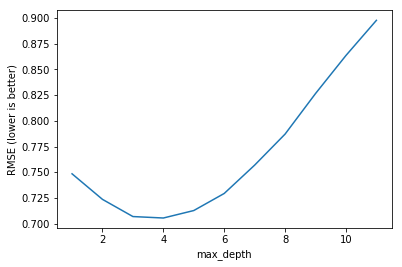

In [61]:
# Plot max_depth (x-axis) versus RMSE (y-axis).
plt.plot(max_depth_range, RMSE_scores);
plt.xlabel('max_depth');
plt.ylabel('RMSE (lower is better)');

In [62]:
# Show the best RMSE and the corresponding max_depth.
sorted(zip(RMSE_scores, max_depth_range))[0]

(0.7054546548845575, 4)

In [63]:
# max_depth=XXX was best, so fit a tree using that parameter.

####### DON'T FORGET TO ADJUST MAX_DEPTH #####
treereg = DecisionTreeRegressor(max_depth=4, random_state=1)
treereg.fit(X, y)

# Compute feature importances.
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_}).sort_values(by='importance')

,feature,importance
0,num_employees,0.000000
7,treat_noteffective,0.000000
9,gender,0.000000
1,ease_askleave,0.006665
6,treat_effective,0.007020
8,age,0.020816
4,obs_bad_rxn,0.025316
5,rxn_coworker,0.029279
2,disc_mhstigma,0.198694
3,team_mhstigma,0.712209


####  vvvvvvv    HELP - Decision Tree Image     vvvvvv

? # Fit a classification tree with max_depth=2 on all data.
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

treeclf = DecisionTreeClassifier(max_depth=4, random_state=1)
treeclf.fit(X, y)

? # Create a Graphviz file.
export_graphviz(treeclf, out_file='../tree.dot', feature_names=feature_cols)

## 2) Predicting Y with Random Forest

In [64]:
from sklearn.ensemble import RandomForestRegressor

# max_features=4 is best and n_estimators=150 is sufficiently large.
rfreg = RandomForestRegressor(n_estimators=150, max_features=4, 
                              oob_score=True, random_state=1)
rfreg.fit(X, y)

# Compute feature importances.
pd.DataFrame({'feature':feature_cols, 'importance':rfreg.feature_importances_}).sort_values(by='importance')

,feature,importance
9,gender,0.034553
7,treat_noteffective,0.054289
4,obs_bad_rxn,0.058540
5,rxn_coworker,0.068611
6,treat_effective,0.072641
0,num_employees,0.082191
1,ease_askleave,0.086540
2,disc_mhstigma,0.106734
8,age,0.182800
3,team_mhstigma,0.253102


In [65]:
df_d.columns

Index(['num_employees', 'ease_askleave', 'disc_mhstigma', 'mh_hurt_career',
       'team_mhstigma', 'obs_bad_rxn', 'rxn_coworker', 'treat_effective',
       'treat_noteffective', 'age', 'gender'],
      dtype='object')

In [66]:
# Compute the out-of-bag R-squared score.
print('OOB R-sq Score: ',(rfreg.oob_score_))

# Find the average RMSE.
scores = cross_val_score(rfreg, X, y, cv=10, scoring='neg_mean_squared_error')
print('Average RMSE: ', np.mean(np.sqrt(-scores)))
preXreduced_RMSE = np.mean(np.sqrt(-scores))

# Check the shape of X to start thinking about reducing X to its most important features.
print('Shape: ', X.shape)

OOB R-sq Score:  0.3266879914728601
Average RMSE:  0.6905096760056233
Shape:  (1427, 10)


### 2.1 Reducing X to it's most important features

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 89)

# Fit the model on only the train data
rfreg = RandomForestRegressor(n_estimators=150, max_features=1, 
                              oob_score=True, random_state=1)
rfreg.fit(X_train, y_train);

# Set a threshold for which features to include.
from sklearn.feature_selection import SelectFromModel

print('Threshold by Mean: ', SelectFromModel(rfreg, threshold='mean', prefit=True).transform(X_train).shape)
print('Threshold by Median: ',SelectFromModel(rfreg, threshold='median', prefit=True).transform(X_train).shape)

Threshold by Mean:  (1070, 3)
Threshold by Median:  (1070, 5)


### 2.2) Using the fit model and the features from the train data to transform the test data
### Comparing RMSE before/after X-reduction

In [68]:
# Create a new feature matrix that only includes important features.

X_important =  SelectFromModel(rfreg, threshold='mean', prefit=True).transform(X_test)

# Check the RMSE for a random forest that only includes important features.

####### DON'T FORGET TO ADJUST MAX FEATURES GIVEN THRESHOLD BY MEAN/MEDIAN  ########

rfreg = RandomForestRegressor(n_estimators=150, max_features=3, random_state=1)

scores = cross_val_score(rfreg, X_important, y_test, cv=10, scoring='neg_mean_squared_error')
print('Average RMSE Score', np.mean(np.sqrt(-scores)))
print('Pre-X Reduced Avg.RMSE Score', preXreduced_RMSE)

Average RMSE Score 0.7324722106021264
Pre-X Reduced Avg.RMSE Score 0.6905096760056233


# Trying to Decide Which to Use

## Tuning Individual Parameters

from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor()
rfreg;

### Tuning n_estimators

?# List of values to try for n_estimators:
estimator_range = list(range(10, 310, 10))

?# List to store the average RMSE for each value of n_estimators:
RMSE_scores = []

?# Use five-fold cross-validation with each value of n_estimators (Warning: Slow!).
for estimator in estimator_range:
    rfreg = RandomForestRegressor(n_estimators=estimator, random_state=1)
    MSE_scores = cross_val_score(rfreg, X, y, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

?###  THIS TAKES A BIT OF TIME   ### 
    
?# Plot RMSE (y-axis) versus n_estimators (x-axis).

plt.plot(estimator_range, RMSE_scores);

plt.xlabel('n_estimators');
plt.ylabel('RMSE (lower is better)');


?###  THIS TAKES A BIT OF TIME   ###

### Tuning max_features

?# List of values to try for max_features:
feature_range = list(range(1, len(feature_cols)+1))

?# List to store the average RMSE for each value of max_features:
RMSE_scores = []

?# Use 10-fold cross-validation with each value of max_features (Warning: Super slow!).
for feature in feature_range:
    rfreg = RandomForestRegressor(n_estimators=150, max_features=feature, random_state=1)
    MSE_scores = cross_val_score(rfreg, X, y, cv=10, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))
    
    
?###  THIS TAKES A BIT OF TIME   ### 

?# Plot max_features (x-axis) versus RMSE (y-axis).

plt.plot(feature_range, RMSE_scores);

plt.xlabel('max_features');
plt.ylabel('RMSE (lower is better)');

?# Show the best RMSE and the corresponding max_features.
print('Best RMSE and its max_features:', sorted(zip(RMSE_scores, feature_range))[0])

# STILL TRYING TO DECIDE



# Messing with Unsupervised Clusters 



from sklearn.cluster import KMeans
X = df_d
km = KMeans(n_clusters=3, random_state=1)
km.fit(X)

km.labels_

df_d['cluster'] = km.labels_
df_d.sort_values('cluster').head()

km.cluster_centers_

centers = df_d.groupby('cluster').mean()

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow'])

?###    Scatter 1: Age vs. Treatment Effective   ####

plt.scatter(df_d.age, df_d.treat_effective, c=colors[df_d.cluster], s=50);

?# Cluster centers, marked by "+"
plt.scatter(centers.age, centers.treat_effective, linewidths=3, marker='+', s=300, c='black');

?# Add labels
plt.xlabel('age');
plt.ylabel('treat_effective');

?###    Scatter 2: Age vs. Treatment Not Effective   ####

plt.scatter(df_d.age, df_d.treat_noteffective, c=colors[df_d.cluster], s=50);

?# Cluster centers, marked by "+"
plt.scatter(centers.age, centers.treat_noteffective, linewidths=3, marker='+', s=300, c='black');

?# Add labels
plt.xlabel('age');
plt.ylabel('treat_noteffective');

?###    Scatter 2: Age vs. Treatment Not Effective   ####

plt.scatter(df_d.age, df_d.treat_noteffective, c=colors[df_d.cluster], s=50);

?# Cluster centers, marked by "+"
plt.scatter(centers.age, centers.treat_noteffective, linewidths=3, marker='+', s=300, c='black');

?# Add labels
plt.xlabel('age');
plt.ylabel('treat');

?### Need to reduce the number of variables
#pd.plotting.scatter(X, c=colors[df_f.cluster], figsize=(10,10), s=100);

# Cluster, Classification, Regressions

from sklearn.cluster import DBSCAN
from sklearn.linear_model import LinearRegression

?## Function to Plot
def set_colors(labels, colors='rgbykcm'):
    colored_labels = []
    for label in labels:
        colored_labels.append(colors[label])
    return colored_labels

?## Synthetic Data
from scipy.stats import multivariate_normal
data = []
dist = multivariate_normal(mean=[0, 0], cov=[[0.5, 0.5],[0,0.1]])
for i in range(150):
    p = list(dist.rvs())
    data.append(dist.rvs())
dist = multivariate_normal(mean=[1, 5], cov=[[0.5, 0.5],[0,0.1]])
for i in range(150):
    data.append(dist.rvs())
dist = multivariate_normal(mean=[2, 10], cov=[[0.5, 0.5],[0,0.1]])
for i in range(150):
    data.append(dist.rvs())


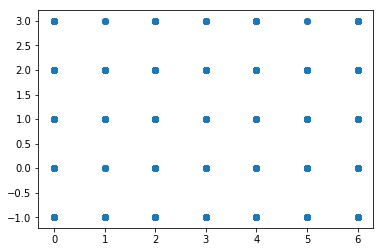

In [69]:
df_cluster = pd.DataFrame(df_d, columns=["num_employees", "treat_effective"])
df_cluster.head()
plt.scatter(df_cluster['num_employees'], df_cluster['treat_effective'])
plt.show()

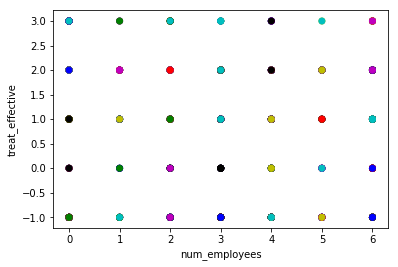

In [70]:
import random

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.cluster import DBSCAN
from sklearn.linear_model import LinearRegression


def set_colors(labels, colors='rgbykcm'):
    colored_labels = []
    for label in labels:
        colored_labels.append(colors[label])
    return colored_labels

## Find Clusters
# Fit a DBSCAN estimator.
estimator = DBSCAN(eps=0.8, min_samples=10)
X = df_cluster[["num_employees", "treat_effective"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute.
labels = estimator.labels_


plt.scatter(df_cluster['num_employees'], df_cluster['treat_effective'], c='rgbykcm')
plt.xlabel("num_employees")
plt.ylabel("treat_effective")
plt.show()


In [71]:

## Add cluster labels: 'cluster_0', 'cluster_1' , etc.
#Note that -1 clusters are outliers.
df_cluster["cluster"] = labels
df_cluster = pd.concat([df_cluster, pd.get_dummies(df_cluster['cluster'], prefix="cluster")], axis=1)
df_cluster.head(3)



,num_employees,treat_effective,cluster,cluster_-1,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,...,cluster_21,cluster_22,cluster_23,cluster_24,cluster_25,cluster_26,cluster_27,cluster_28,cluster_29,cluster_30
0,3.0,-1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,-1,2,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
## Fit Linear model with clusters

model = LinearRegression()
X = df_cluster[["num_employees", "cluster_0", "cluster_1", "cluster_2"]]
y = df_cluster['treat_effective']
model.fit(X, y)

print((model.score(X, y)))

0.2281593705071714


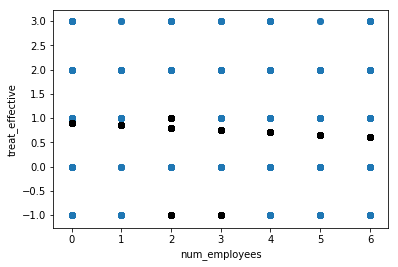

In [73]:
## Plot linear model

plt.scatter(df_cluster['num_employees'], df_cluster['treat_effective'])
plt.xlabel("num_employees")
plt.ylabel("treat_effective")

plt.scatter(df_cluster["num_employees"], model.predict(X), color='black')

plt.show()

0.0008638688795022942


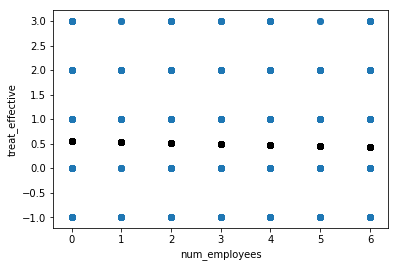

In [74]:
model = LinearRegression()
X = df_cluster[["num_employees"]]
y = df_cluster['treat_effective']
model.fit(X, y)
print((model.score(X, y)))

plt.scatter(df_cluster['num_employees'], df_cluster['treat_effective'])
plt.xlabel("num_employees")
plt.ylabel("treat_effective")

plt.scatter(df_cluster["num_employees"], model.predict(X), color='black')

plt.show()

## Hierarchial Clustering

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=4)
agg.fit(X_scaled)
labels = agg.labels_

df_d['cluster'] = agg.labels_
df_d.sort_values('cluster')
pd.plotting.scatter_matrix(X, c=colors, figsize=(20,20), s=100);